In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/rk/1txw87pj7sgdsrd0ny5897580000gn/T/ipykernel_91505/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('Pacifico_cleaned.csv')

In [4]:
# Contar el número de observaciones (filas)
num_observations = len(df)

# Mostrar el resultado
print(f"El numero de observaciones es: {num_observations}")

El numero de observaciones es: 237382


In [5]:
print(df.describe())

             periodo  cole_area_ubicacion  cole_calendario  cole_naturaleza  \
count  237382.000000        237382.000000    237382.000000    237382.000000   
mean    20152.144948             0.813065         0.930614         0.780392   
std         8.058124             0.389860         0.254110         0.413982   
min     20142.000000             0.000000         0.000000         0.000000   
25%     20142.000000             1.000000         1.000000         1.000000   
50%     20152.000000             1.000000         1.000000         1.000000   
75%     20162.000000             1.000000         1.000000         1.000000   
max     20162.000000             1.000000         1.000000         1.000000   

         estu_genero  fami_cuartoshogar  fami_estratovivienda  \
count  237382.000000      237382.000000         237382.000000   
mean        0.437818           2.937813              1.658601   
std         0.496119           1.088452              0.898636   
min         0.000000        

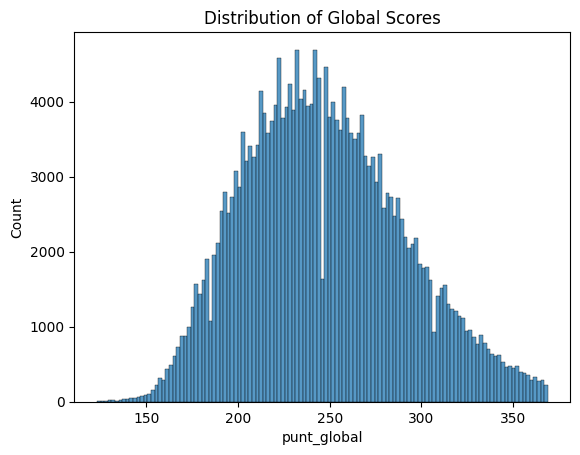

In [6]:
# Visualize distribution of a specific column
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['punt_global'])
plt.title('Distribution of Global Scores')
plt.show()



El puntaje medio de Choco es 218.21480932377892
El puntaje medio de Valle es 251.60838170849695
El puntaje medio de Cauca es 236.7163520582215
El puntaje medio de Nariño es 252.74451139940123


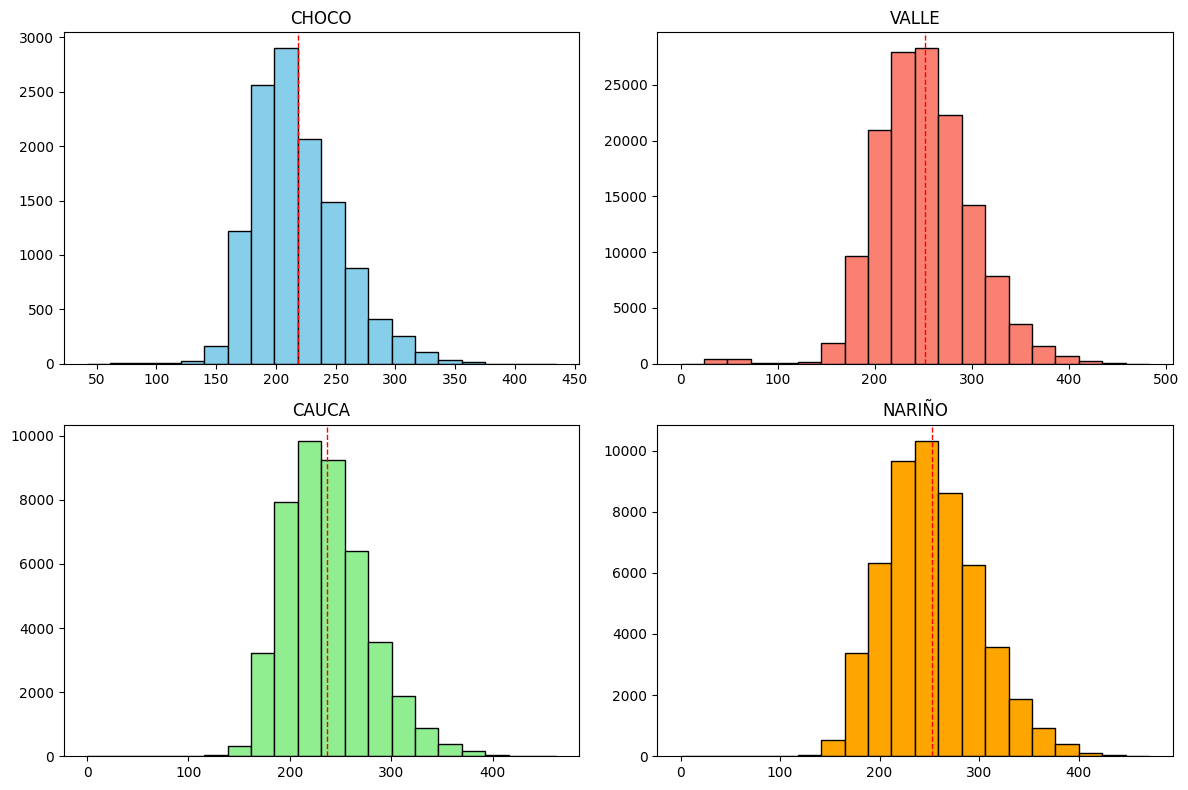

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos desde el archivo CSV
df = pd.read_csv('Pacifico.csv')

# Filtrar datos para los departamentos seleccionados cole_depto_ubicacion
choco_data = df[df['cole_depto_ubicacion'] == 'CHOCO']['punt_global']
valle_data = df[df['cole_depto_ubicacion'] == 'VALLE']['punt_global']
cauca_data = df[df['cole_depto_ubicacion'] == 'CAUCA']['punt_global']
narino_data = df[df['cole_depto_ubicacion'] == 'NARIÑO']['punt_global']

# Calcular puntaje medio para cada departamento
choco_mean = choco_data.mean()
valle_mean = valle_data.mean()
cauca_mean = cauca_data.mean()
narino_mean = narino_data.mean()
print('El puntaje medio de Choco es',choco_mean)
print('El puntaje medio de Valle es',valle_mean)
print('El puntaje medio de Cauca es',cauca_mean)
print('El puntaje medio de Nariño es',narino_mean)

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Crear histogramas para cada departamento
axs[0, 0].hist(choco_data, bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('CHOCO')
axs[0, 1].hist(valle_data, bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_title('VALLE')
axs[1, 0].hist(cauca_data, bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('CAUCA')
axs[1, 1].hist(narino_data, bins=20, color='orange', edgecolor='black')
axs[1, 1].set_title('NARIÑO')

axs[0, 0].axvline(choco_mean, color='red', linestyle='dashed', linewidth=1)
axs[0, 1].axvline(valle_mean, color='red', linestyle='dashed', linewidth=1)
axs[1, 0].axvline(cauca_mean, color='red', linestyle='dashed', linewidth=1)
axs[1, 1].axvline(narino_mean, color='red', linestyle='dashed', linewidth=1)


# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar filas donde 'PUNT_GLOBAL' o 'COLE_CARACTER' tienen valores faltantes
df_cleaned = df_cleaned.dropna(subset=['punt_global', 'cole_caracter'])

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el gráfico de violín
sns.violinplot(x='cole_caracter', y='punt_global', data=df_cleaned, palette='muted', scale='width')

# Ajustar la rotación de las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Título y etiquetas
plt.title('Distribución de PUNT_GLOBAL en función de COLE_CARACTER')
plt.xlabel('COLE_CARACTER')
plt.ylabel('Puntaje Global')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

NameError: name 'df_cleaned' is not defined

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()